Amazon Prime video dataset analysis:
    
In this notebook, I am analyzing a dataset on the Movies and TV shows of Amazon Prime Video from Kaggle.
The idea is to find out if there are shortcuts to finding out if a film(TV show or movie) has a high IMDb score. To answer that
I ask the following questions:
    
    1.Are TV shows that get picked up for more seasons rated higher on IMDB?
    2.Do Movies and TV shows that fit into more genres get higher IMDb scores?
    3.Are older films rated higher on IMDB than newer films?
    4.Do certain individual film genres get universal acclaim or hate on IMDb?
    5.Are more popular films rated higher on IMDb?

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [28]:
df =pd.read_csv("/Users/matt/documents/titles.csv")

In [29]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [31]:
df.isna().any()

id                      False
title                   False
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
dtype: bool

In [13]:
tv_shows = df[df["type"]=="SHOW"]
seasons = tv_shows['seasons']
score= tv_shows['imdb_score']

Does the number of seasons a show has predict it's IMDb score? Let's plot their relationship to find out.

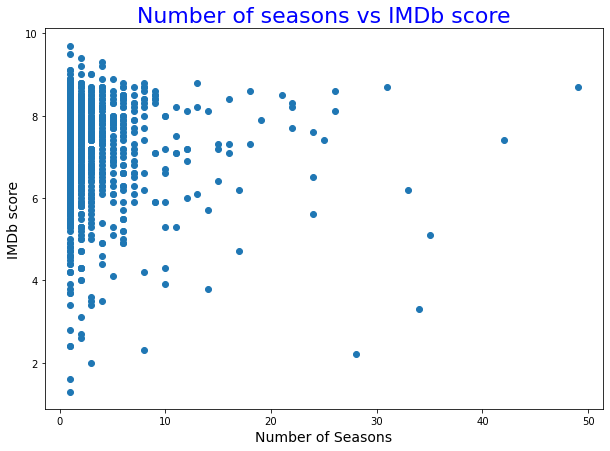

In [32]:

plt.figure(figsize=(10,7))
plt.scatter(seasons,score)
plt.title("Number of seasons vs IMDb score", fontsize=22, color="blue")
plt.xlabel("Number of Seasons", fontsize = 14)
plt.ylabel("IMDb score", fontsize=14);

The above graph suggests that there's no correlation between how long a  TV show runs and how well it's reviewed. Both shows that were shorter than 5 seasons and those that were longer than 10 seasons contained many ratings above 8 and below 4. 

In [33]:
df['num_genres'] = df['genres'].apply(lambda x: len(x.split()))

In [34]:
num_genres = df['num_genres']
imdb_score = df["imdb_score"]

Are films with a single genre rated differently than films that fit into more genres? Let's graph the relationship between the IMDb score of a film and how many genres it fits into to find out.

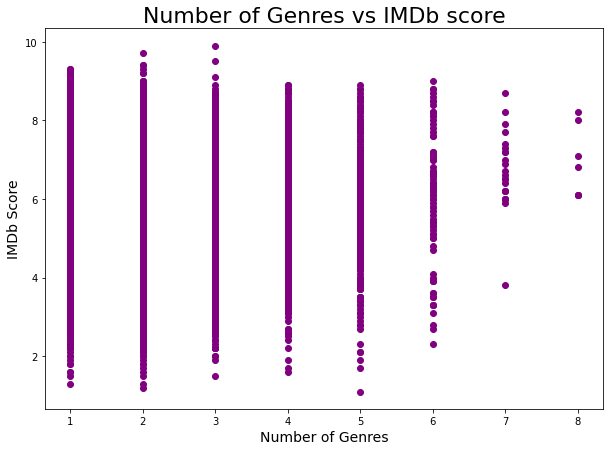

In [35]:
plt.figure(figsize = (10,7))
plt.scatter(num_genres, imdb_score, color="purple")
plt.title("Number of Genres vs IMDb score", fontsize=22)
plt.xlabel("Number of Genres", fontsize=14)
plt.ylabel("IMDb Score", fontsize =14);

The ratings look the identical no matter how many genres are present. This suggests there's no correlation between how many genres a Movie or TV show fits into and it's rating on IMDb

In [36]:
release_date = df["release_year"]

Are older movies rated higher than newer movies on IMDb? The graph below tries to figure that out by showing the relationship between IMDb scores and the date a movie came out.

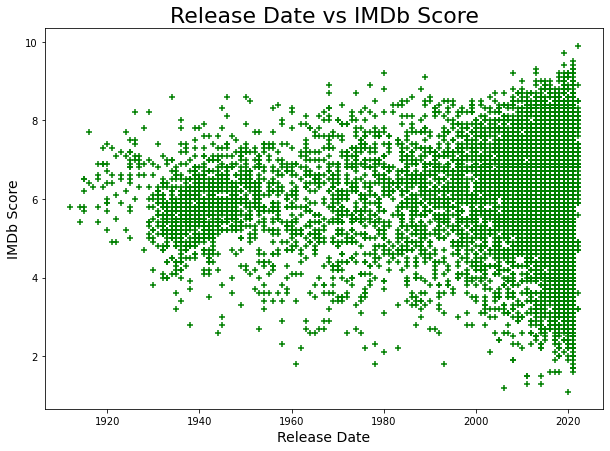

In [37]:
plt.figure(figsize=(10,7))
plt.title("Release Date vs IMDb Score", fontsize=22)
plt.scatter(release_date,imdb_score, color="green", marker="+")
plt.xlabel('Release Date', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14);

the graph above shows that older movies and newer movies get very similar ratings, so release date probably doesn't predict IMDb score

In [38]:
single_genre = df[df["num_genres"]==1]
single_genre.dropna()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,num_genres
986,ts21689,NOVA,SHOW,PBS' premier science series helps viewers of a...,1974,TV-PG,57,['documentation'],['US'],49.0,tt0206501,8.7,2725.0,71.043,7.1,1
1016,ts46032,Gardeners' World,SHOW,Gardeners' World is a long-running BBC Televis...,1968,TV-G,54,['documentation'],['GB'],22.0,tt0260618,8.3,243.0,10.063,8.5,1
1038,ts21412,Route 66,SHOW,Route 66 is an American TV series in which two...,1960,TV-Y7,51,['drama'],['US'],4.0,tt2367863,7.8,1697.0,7.797,6.2,1
1114,ts22096,Here's Lucy,SHOW,Here's Lucy is Lucille Ball's third network te...,1968,TV-G,30,['comedy'],['US'],6.0,tt0062570,6.8,1584.0,7.342,7.3,1
1136,ts238,The Duchess of Duke Street,SHOW,"Set in London between 1900 and 1925, the story...",1976,TV-PG,52,['drama'],['GB'],2.0,tt0335657,8.3,1375.0,3.741,8.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,ts216926,Harlem,SHOW,A group of four friends follow their dreams af...,2021,TV-MA,34,['comedy'],['US'],2.0,tt10608454,6.8,3058.0,6.930,8.4,1
9078,ts300411,Uprising,SHOW,Steve McQueen and James Rogan’s new docuseries...,2021,TV-14,59,['documentation'],['GB'],1.0,tt15046042,7.4,226.0,1.377,6.0,1
9142,ts329879,MotoGP Unlimited,SHOW,"The eight-episode series, filmed by The Mediap...",2022,TV-Y7,48,['documentation'],"['US', 'ES']",1.0,tt18396468,7.9,121.0,5.128,8.0,1
9164,ts303282,Tampa Baes,SHOW,Reality series follows a young group of lesbia...,2021,TV-MA,43,['reality'],['US'],1.0,tt15076878,4.4,349.0,5.372,1.0,1


In [39]:
single_genre = df[df["num_genres"]==1]
single_genre_imdb_scores = single_genre.groupby("genres").mean()["imdb_score"].dropna()[:-1].sort_values(ascending=False)


Are there certain genres that are sure to get very high or or very low ratings on IMDb? I find out by comparing the average IMDb score of each genre below.

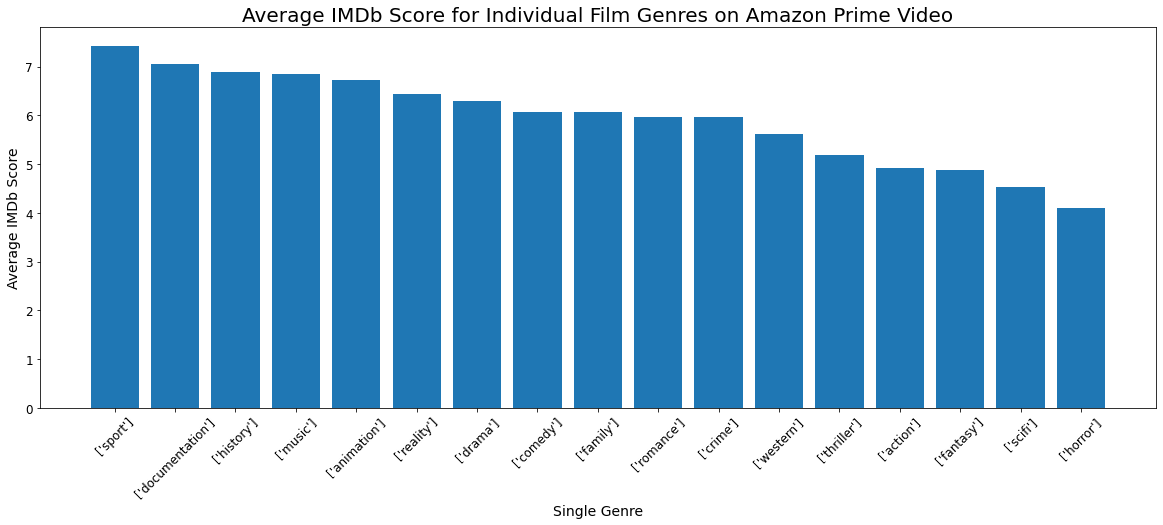

In [40]:
plt.figure(figsize=(20,7))
plt.bar(single_genre_imdb_scores.keys(), single_genre_imdb_scores)
plt.title("Average IMDb Score for Individual Film Genres on Amazon Prime Video", fontsize=20)
plt.xlabel("Single Genre", fontsize=14)
plt.ylabel("Average IMDb Score", fontsize=14)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12);

Most genres are within a couple of points of one another and no genre is reviewed exceptionally well or poorly.
Genre doesn't look like a strong predictor of the IMDb rating here. 




Do more popular films get higher IMDb scores? To find out I used the number of votes a movie gets on IMDb as a rough measure of how popular it is and compared that to the IMDb score in the graph below.

In [41]:
df["imdb_votes"].fillna(df["imdb_votes"].mean(),inplace=True)

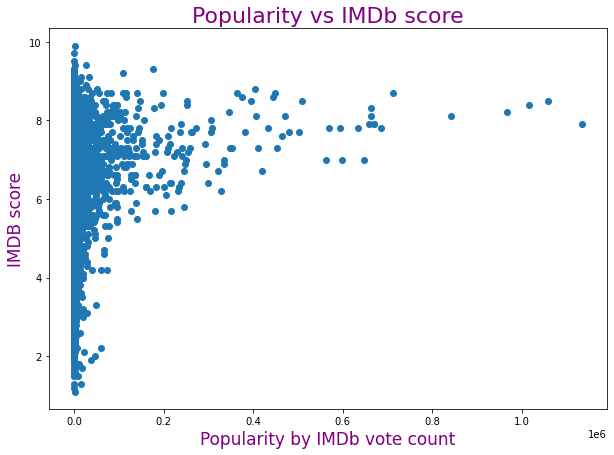

In [42]:
votes = df["imdb_votes"]
i_score = df["imdb_score"]
plt.figure(figsize= (10,7))
plt.scatter(votes,i_score)
plt.title("Popularity vs IMDb score", fontsize=22, color="purple")
plt.xlabel("Popularity by IMDb vote count", fontsize=17, color='purple')
plt.ylabel("IMDB score", fontsize=17, color ='purple');

It looks like there might be a relationship between popularity and film rating, with more popular movies getting better rating. Later I'll do more to try and verify this.





The last relationship I'm curious about is the relationship between IMDb scores and scores on other film sites. If a movie doesn't have many ratings on IMDb or is not listed on the site, will looking at how a different site scores the film be an effective substitute? To figure it out I will graph the relationship between tmdb scores and IMDb scores below to see if there is a correlation between the two.

In [43]:
tmdb_mean = df["tmdb_score"].mean()
df["tmdb_score"].fillna(tmdb_mean,inplace=True)
df["imdb_score"].fillna(df["imdb_score"].mean(),inplace=True)

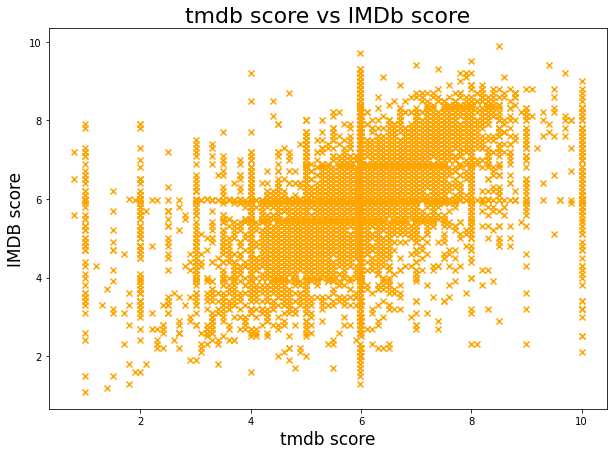

In [44]:
t_score = df["tmdb_score"]
i_score = df["imdb_score"]
plt.figure(figsize = (10,7))
plt.title("tmdb score vs IMDb score", fontsize = 22)
plt.xlabel("tmdb score",fontsize = 17)
plt.ylabel("IMDB score", fontsize =17)
plt.scatter(t_score, i_score, marker= 'x', color = "orange");


looking at this data it's unclear to me whether there's a correlation betwen tmdb and imdb scores. So I will run them both through a linear regression algorithm to quantify how well they correlate below.

In [45]:
X = df[["tmdb_score"]]
y = df["imdb_score"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.24326456763535176

The correlation is .24. That's very low, so we can say that a movie's tmdb score is not a reliable predictor of that movie's IMDb score.




The other thing that was unclear to me was the degree to which popularity and IMDB score are correlated so I also took IMDB scores and how many ratings those films got and ran those through a linear regression algorithm.

In [46]:
X = df[['imdb_votes']]
y = df["imdb_score"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=1)
model=LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.03134158490536609

The correlation is .03 so there's essentially no correlation between IMDb score and the popularity of the film. 



So I didn't end up finding a metric that could effectively predict a film's IMDb score. Here are my final take aways:
    1. IMDb provides a unique service that is not easily replicated. If you want to know what a film is rated on IMDb, you've got to go to their website. 
    2. The fact that IMDb scores don't correlate with tmdb scores is concerning. The 2 websites are trying to measure the same thing so they should have similar ratings, but they don't. This puts into question the idea that an IMDb rating is a good predictor of how good a movie is. 